<a href="https://colab.research.google.com/github/TopData530/ML-Sales-Prediction/blob/main/Project_2_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projects to use for machine learning predictions
##Eric Saechao

In [312]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [313]:
df = pd.read_csv('/content/mushrooms (1).csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [315]:
pd.set_option('display.max_column', None)

##Attribute Information: (classes: edible=e, poisonous=p)

* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,* white=w,yellow=y

* bruises: bruises=t,no=f

* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* gill-attachment: attached=a,descending=d,free=f,notched=n

* gill-spacing: close=c,crowded=w,distant=d

* gill-size: broad=b,narrow=n

* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

* stalk-shape: enlarging=e,tapering=t

* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* veil-type: partial=p,universal=u

* veil-color: brown=n,orange=o,white=w,yellow=y
 
* ring-number: none=n,one=o,two=t

* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [316]:
#Make copy of dataframe
ml_df = df.copy()

In [317]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [318]:
ml_df.duplicated().sum()

0

No duplicates in dataset

In [319]:
#Delete unnecessary columns
ml_df.drop(['bruises','stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
                             'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'ring-number', 'population'], axis=1)

,class,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-spacing,gill-size,gill-color,veil-color,ring-type,spore-print-color,habitat
0,p,x,s,n,p,f,c,n,k,w,p,k,u
1,e,x,s,y,a,f,c,b,k,w,p,n,g
2,e,b,s,w,l,f,c,b,n,w,p,n,m
3,p,x,y,w,p,f,c,n,n,w,p,k,u
4,e,x,s,g,n,f,w,b,k,w,e,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,n,a,c,b,y,o,p,b,l
8120,e,x,s,n,n,a,c,b,y,n,p,b,l
8121,e,f,s,n,n,a,c,b,n,o,p,b,l
8122,p,k,y,n,y,f,c,n,b,w,e,w,l


In [320]:
ml_df.duplicated().sum()

0

Dropped columns that aren't really needed because it doesnt give enough relative data to target.

Lots of duplicates but has discrepencies because of dataset and unable to drop do to similarities that it counts as duplicates.


In [321]:
#Check for missing values
ml_df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

##Identify and correct inconsistencies in data for categorical values

In [322]:
#Check objects of dataset
dtypes = ml_df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [323]:
#Check for inconsistencies in objects
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= class
e    4208
p    3916
Name: class, dtype: int64



- Column= cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64



- Column= cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64



- Column= cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64



- Column= bruises
f    4748
t    3376
Name: bruises, dtype: int64



- Column= odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64



- Column= gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64



- Column= gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64



- Column= gill-size
b    5612
n    2512
Name: gill-size, dtype: int64



- Column= gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r 

No inconsistencies in dataset except all the data's row has letters instead of words so we dont know what it means. No outliers found in data

##Replace all columns rows with words instead of letters

In [324]:
#Change all columns values
ml_df['class'].replace({'p':'Poisonous', 'e':'Edible'}, inplace=True)
ml_df['cap-color'].replace({'n':'Brown', 'b':'Buff', 'c':'Cinnamon', 'g':'Gray', 
                            'r':'Green', 'p':'Pink', 'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow'}, inplace=True)
ml_df['cap-shape'].replace({'b':'Bell', 'c':'Conical', 'x':'Convex', 'f':'flat',
                            'k':'Knobbed', 's':'Sunken'}, inplace=True)
ml_df['cap-surface'].replace({'f':'Fibrous', 'g':'Grooves', 'y':'Scaly', 's':'smooth'}, inplace=True)
ml_df['gill-attachment'].replace({'a':'Attached', 'd':'Descending', 'f':'Free', 'n':'Notched'}, inplace=True)
ml_df['gill-spacing'].replace({'c':'Close', 'w':'Crowded', 'd':'Distance'}, inplace=True)
ml_df['gill-size'].replace({'b':'Broad', 'n':'Narrow'}, inplace=True)
ml_df['gill-color'].replace({'k':'Black', 'n':'Brown', 'b':'Buff', 'h':'Chocolate',
                             'g':'Gray', 'r':'Green', 'o':'Orange', 'p':'Pink',
                             'u':'Purple', 'e':'Red', 'w':'White', 'y':'Yellow'}, inplace=True)
ml_df['veil-color'].replace({'n':'Brown', 'o':'Orange', 'w':'White', 'y':'Yellow'}, inplace=True)
ml_df['ring-type'].replace({'c':'Cobwebby', 'e':'Evanescent','f':'Flaring', 'l':'Large',
                            'n':'None', 'p':'Pendant', 's':'Sheating', 'z':'Zone'}, inplace=True)
ml_df['spore-print-color'].replace({'k':'Black', 'n':'Brown', 'h':'Chocolate', 'r':'Green','b':'Buff',
                                     'o':'Orange', 'u':'Purple', 'w':'White', 'y':'Yellow'}, inplace=True)
ml_df['habitat'].replace({'g':'Grasses', 'l':'Leaves', 'm':'Meadows', 'p':'Paths',
                          'u':'Urban', 'w':'Waste', 'd':'Woods'}, inplace=True)
ml_df['population'].replace({'a':'Abundant', 'c':'Clustered', 'n':'Numerous', 's':'Scattered',
                          'v':'Several', 'y':'Solitary'}, inplace=True)


Changed all rows letters to names for clearer representation of columns.

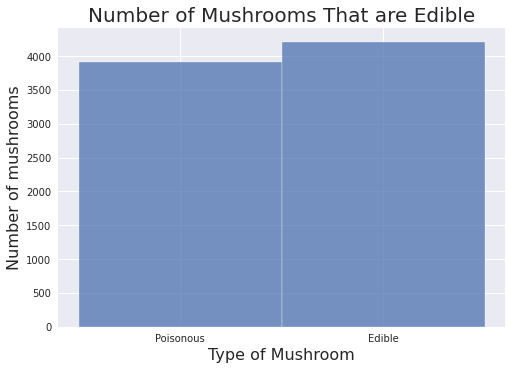

In [325]:
from matplotlib import legend
from seaborn.rcmod import set_style
# Use Histogram to produce target visualization
sns.histplot(data=ml_df, x='class');
set_style('darkgrid')
plt.xlabel('Type of Mushroom', fontsize=16);
plt.ylabel('Number of mushrooms', fontsize=16);
plt.title('Number of Mushrooms That are Edible', fontsize=20);

Number of edible mushrooms.

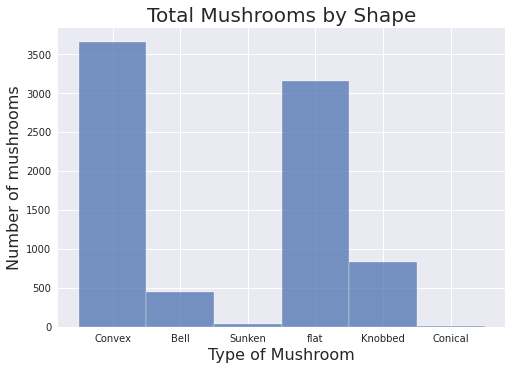

In [326]:
sns.histplot(data=ml_df, x='cap-shape');
set_style('darkgrid')
plt.xlabel('Type of Mushroom', fontsize=16);
plt.ylabel('Number of mushrooms', fontsize=16);
plt.title('Total Mushrooms by Shape', fontsize=20);

Most the mushrooms in dataset have flat or convex cap shapes.

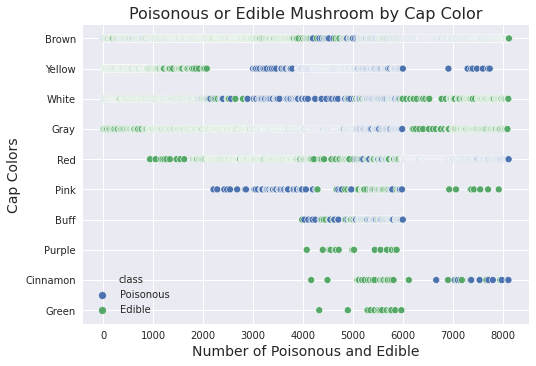

In [327]:
sns.scatterplot(x=ml_df.index, y=ml_df['cap-color'], hue=ml_df['class']);
plt.ylabel('Cap Colors', fontsize=14);
plt.xlabel('Number of Poisonous and Edible',fontsize=14);
plt.title('Poisonous or Edible Mushroom by Cap Color', fontsize=16);

Number of poisonous and edible mushrooms in relation to cap color

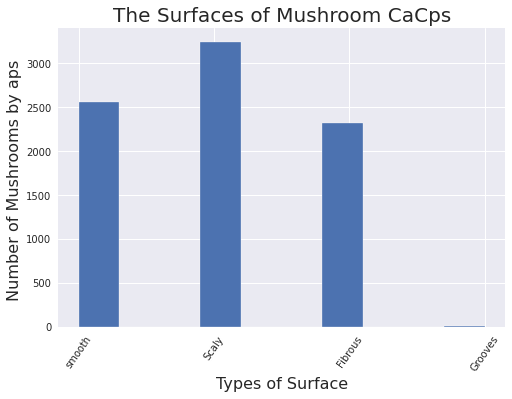

In [328]:
plt.style.use('seaborn')
ml_df['cap-surface'].hist()
set_style('darkgrid')
plt.xticks(rotation=55)
plt.xlabel('Types of Surface', fontsize=16);
plt.ylabel('Number of Mushrooms by aps ', fontsize=16);
plt.title('The Surfaces of Mushroom CaCps', fontsize=20);

Most the mushrooms caps have fairly the same amount of different surface except grooves.

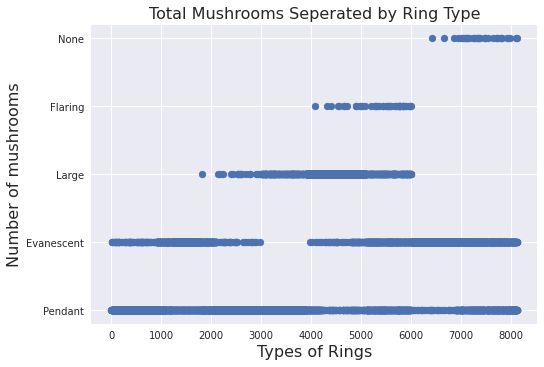

In [329]:
plt.scatter(ml_df.index, ml_df['ring-type']);
plt.xlabel('Types of Rings', fontsize=16);
plt.ylabel('Number of mushrooms',fontsize=16);
plt.title('Total Mushrooms Seperated by Ring Type',fontsize=16);

Mushrooms of ring types and pendant makes up the majority of the mushrooms.

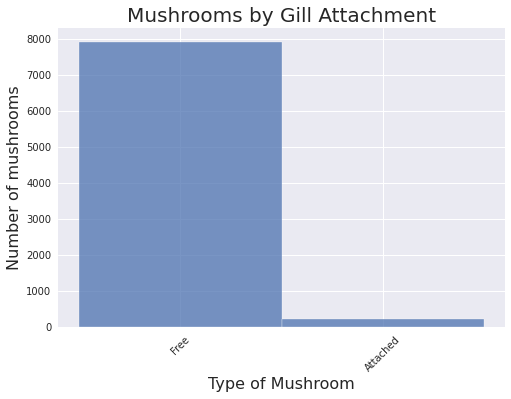

In [330]:
sns.histplot(data=ml_df, x='gill-attachment');
set_style('darkgrid')
plt.xticks(rotation= 45)
plt.xlabel('Type of Mushroom', fontsize=16);
plt.ylabel('Number of mushrooms', fontsize=16);
plt.title('Mushrooms by Gill Attachment', fontsize=20);

Majority of the gill attachment is free.

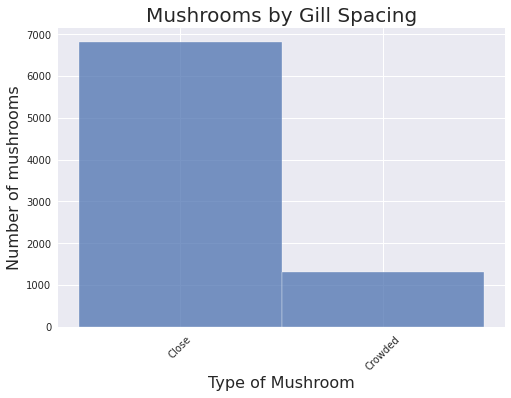

In [331]:
sns.histplot(data=ml_df, x='gill-spacing');
set_style('darkgrid')
plt.xticks(rotation= 45)
plt.xlabel('Type of Mushroom', fontsize=16);
plt.ylabel('Number of mushrooms', fontsize=16);
plt.title('Mushrooms by Gill Spacing', fontsize=20);


Amount of mushrooms in dataset that are closed or crowded

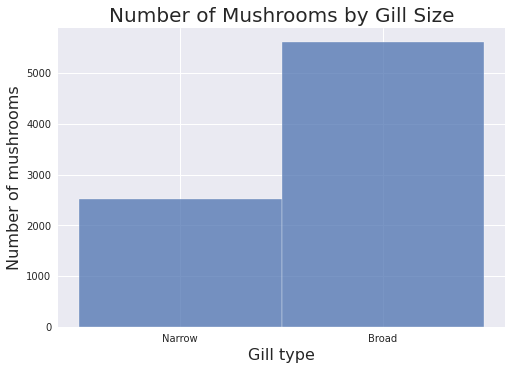

In [332]:
sns.histplot(data=ml_df, x='gill-size');
set_style('darkgrid')
plt.xlabel('Gill type', fontsize=16);
plt.ylabel('Number of mushrooms', fontsize=16);
plt.title('Number of Mushrooms by Gill Size', fontsize=20);

The chart shows that broad gill size has twice the amount of narrow gill size from dataset.

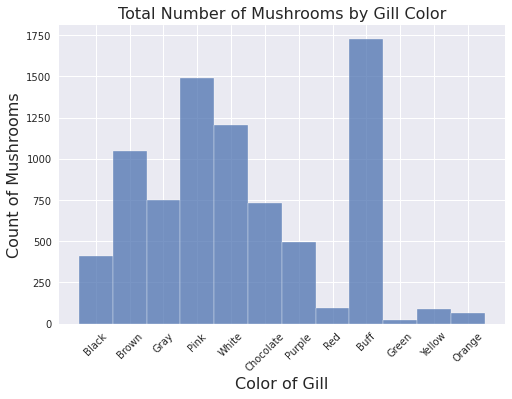

In [333]:
sns.histplot(data=ml_df, x='gill-color');
plt.xticks(rotation=45);
plt.xlabel('Color of Gill', fontsize=16);
plt.ylabel('Count of Mushrooms',fontsize=16);
plt.title('Total Number of Mushrooms by Gill Color', fontsize=16);

Gill colors and we can see that most the mushrooms are a buff color. 

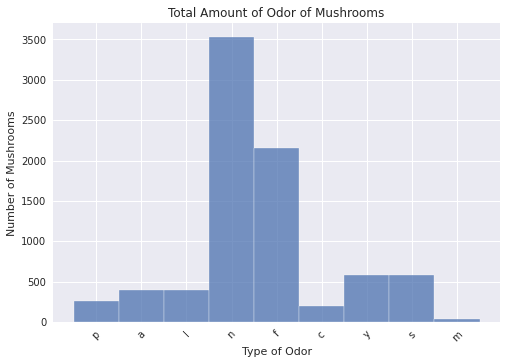

In [334]:
sns.histplot(data=ml_df, x='odor');
plt.xticks(rotation=45);
plt.xlabel('Type of Odor');
plt.ylabel('Number of Mushrooms');
plt.title('Total Amount of Odor of Mushrooms');

We can see most mushrooms in dataset have no smell or a foul smell.

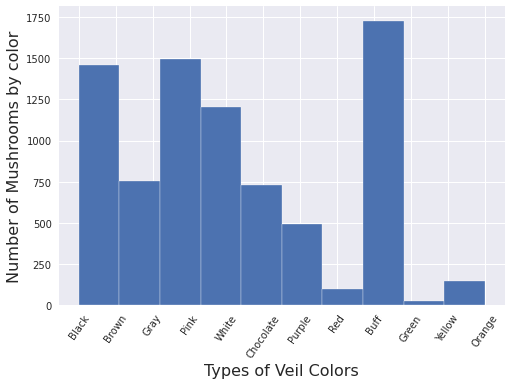

In [335]:
plt.style.use('seaborn')
ml_df['gill-color'].hist()
set_style('darkgrid')
plt.xticks(rotation=55)
plt.xlabel('Types of Veil Colors', fontsize=16);
plt.ylabel('Number of Mushrooms by color', fontsize=16);

Some colors of the veil are more than others.

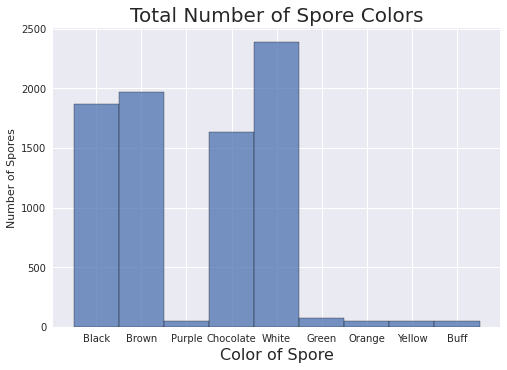

In [336]:
sns.histplot(data= ml_df, x= 'spore-print-color', edgecolor='black');
plt.xlabel('Color of Spore', fontsize=16);
plt.title('Total Number of Spore Colors',fontsize=20);
plt.ylabel('Number of Spores');

Number of mushrooms spores by colors and there are four colors that make up the majority of the dataset.

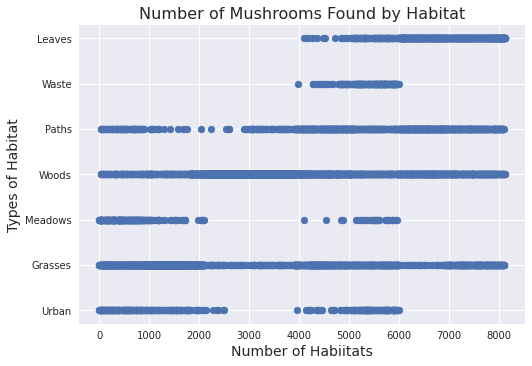

In [337]:
plt.scatter(ml_df.index, ml_df['habitat']);
plt.xlabel('Number of Habiitats', fontsize=14);
plt.ylabel('Types of Habitat', fontsize=14);
plt.title('Number of Mushrooms Found by Habitat', fontsize=16);

A scatterplot of the habitats most mushrooms were found in and four of the areas make up the majority of the dataset.

In [338]:
ml_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,Edible,Convex,Scaly,Brown,f,n,Free,Close,Broad,Buff,t,b,s,s,w,w,p,White,o,Pendant,White,Several,Woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [339]:
ml_df.groupby(by=['cap-shape','class']).count()


cap-surface  cap-color  bruises  odor  gill-attachment  \
cap-shape class                                                               
Bell      Edible             404        404      404   404              404   
          Poisonous           48         48       48    48               48   
Conical   Poisonous            4          4        4     4                4   
Convex    Edible            1948       1948     1948  1948             1948   
          Poisonous         1708       1708     1708  1708             1708   
Knobbed   Edible             228        228      228   228              228   
          Poisonous          600        600      600   600              600   
Sunken    Edible              32         32       32    32               32   
flat      Edible            1596       1596     1596  1596             1596   
          Poisonous         1556       1556     1556  1556             1556   

                     gill-spacing  gill-size  gill-color  stalk-shape  \
cap-shape class                                                         
Bell      Edible              404        404         404          404   
          Poisonous            48         48          48           48   
Conical   Poisonous             4          4           4            4   
Convex    Edible             1948       1948        1948         1948   
          Poisonous          1708       1708        1708         1708   
Knobbed   Edible              228        228         228          228   
          Poisonous           600        600         600          600   
Sunken    Edible               32         32          32           32   
flat      Edible             1596       1596        1596         1596   
          Poisonous          1556       1556        1556         1556   

                     stalk-root  stalk-surface-above-ring  \
cap-shape class                                             
Bell      Edible            404                       404   
          Poisonous          48                        48   
Conical   Poisonous           4                         4   
Convex    Edible           1948                      1948   
          Poisonous        1708                      1708   
Knobbed   Edible            228                       228   
          Poisonous         600                       600   
Sunken    Edible             32                        32   
flat      Edible           1596                      1596   
          Poisonous        1556                      1556   

                     stalk-surface-below-ring  stalk-color-above-ring  \
cap-shape class                                                         
Bell      Edible                          404                     404   
          Poisonous                        48                      48   
Conical   Poisonous                         4                       4   
Convex    Edible                         1948                    1948   
          Poisonous                      1708                    1708   
Knobbed   Edible                          228                     228   
          Poisonous                       600                     600   
Sunken    Edible                           32                      32   
flat      Edible                         1596                    1596   
          Poisonous                      1556                    1556   

                     stalk-color-below-ring  veil-type  veil-color  \
cap-shape class                                                      
Bell      Edible                        404        404         404   
          Poisonous                      48         48          48   
Conical   Poisonous                       4          4           4   
Convex    Edible                       1948       1948        1948   
          Poisonous                    1708       1708        1708   
Knobbed   Edible                        228        228         228   
          Poisonous      

#There are no numerical categories in data so there are no outliers

In [340]:
#ml_df['class'] = ml_df['class'].astype(str).astype(int)

In [341]:
## dataframe creation - for plotting
# create new pandas dataframe which contains all counts sorted by population
population_df = (
    ml_df.groupby(["population"])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=["population"]))

In [342]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
## Creating a pie chart
# create labels using all unique values in the column named "population"
labels = population_df["population"].unique()
# group by count of the "population" column.
values = population_df["Counts"]
# Custom define a list of colors to be used for the pie chart.
# Note that the same number of colors are specified as there are unique populations. It is not mandatory, but
# will avoid a single color to be used multiple times.
earth_colors = [
    "rgb(210,180,140)",
    "rgb(218,165,32)",
    "rgb(139,69,19)",
    "rgb(175, 51, 21)",
    "rgb(35, 36, 21)",
    "rgb(188,143,143)",
]
# defining the actual figure using the dimension: population
# Note that a pull keyword was specified to explode pie pieces out of the center
fig = go.Figure(
    data=[
        go.Pie(
            labels=labels,
            values=values,
            # pull is given as a fraction of the pie radius
            pull=[0, 0, 0.07, 0.08, 0.02, 0.2],
            # iterate through earth_colors list to color individual pie pieces
            marker_colors=earth_colors,
        )
    ]
)
# Update layout to show a title
fig.update_layout(title_text="Mushroom Polulation")
# display the figure
fig.show()

In [343]:
## dataframe creation - for plotting
# create new pandas dataframe which contains all counts filtered by 'is-edible' == "edible" and sorted by population
edible_population_df = (
    ml_df.loc[ml_df['class'] == "Edible"]
    .groupby(["population"])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=["population"])
)
# create new pandas dataframe which contains all counts filtered by 'is-edible' == "poisonous" and sorted by population
poisonous_population_df = (
    ml_df.loc[ml_df['class'] == "Poisonous"]
    .groupby(["population"])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=["population"])
)
# get unique values from the just created pandas dataframes and store them in an array
labels_edible_population = edible_population_df["population"].unique()
labels_poisonous_population = poisonous_population_df["population"].unique()
# get all the counts from the created pandas dataframes and store them in an array
values_edible_population = edible_population_df["Counts"]
values_poisonous_population = poisonous_population_df["Counts"]

In [344]:
## Creating two pie charts
# Create subplots: use 'domain' type for Pie subplot

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]])
# create an array of colors which will be custom colors to the plot
earth_colors = [
    "rgb(210,180,120)",
    "rgb(218,165,32)",
    "rgb(139,69,19)",
    "rgb(175, 51, 21)",
    "rgb(35, 36, 21)",
    "rgb(188,143,143)",]
# crate traces to specify the various properties of the first pie chart subplot
fig.add_trace(
    go.Pie(
        labels=labels_edible_population,
        values=values_edible_population,
        name="Edible Mushroom",
        marker_colors=earth_colors,),1,1,)
# crate traces to specify the various properties of the second pie chart subplot
fig.add_trace(
    go.Pie(
        labels=labels_poisonous_population,
        values=values_poisonous_population,
        name="Poisonous Mushroom",
        marker_colors=earth_colors,),1,2,)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=0.4, hoverinfo="label+percent+name")
# adapt layout of the chart for readability
fig.update_layout(
    title_text="Mushroom Population by Edibility",
    # Add annotations in the center of the donut pies.
    annotations=[
        dict(text="Edible", x=0.18, y=0.5, font_size=17, showarrow=False),
        dict(text="Poisonous", x=0.82, y=0.5, font_size=17, showarrow=False),
    ],
)
fig.show()

These pie charts show the populations of mushrooms based on wether they are edible or poisonous. The population that are edible are pretty close but you'll notice that there are numerous populations that are poisonous on the right.

In [345]:
ml_df['odor'].replace({'a':'Almond', 'l':'Anise', 'c':'Creosote', 'y':'Fishy',
                       'f':'foul', 'm':'Musty', 'n':'None', 'p':'Pungent', 's':'Spicy'}, inplace=True)

In [349]:
## dataframe creation - for plotting
# create new pandas dataframe which contains all counts sorted by population
odor_df = (
    ml_df.groupby(['odor'])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=['odor']))

In [350]:
## dataframe creation - for plotting
# create new pandas dataframe which contains all counts filtered by 'is-edible' == "edible" and sorted by population
edible_odor_df = (
    ml_df.loc[ml_df['class'] == "Edible"]
    .groupby(["odor"])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=['odor'])
)
# create new pandas dataframe which contains all counts filtered by 'is-edible' == "poisonous" and sorted by population
poisonous_odor_df = (
    ml_df.loc[ml_df['class'] == "Poisonous"]
    .groupby(["odor"])
    .size()
    .reset_index(name="Counts")
    .sort_values(by=['odor'])
)
# get unique values from the just created pandas dataframes and store them in an array
labels_edible_population2 = edible_odor_df['odor'].unique()
labels_odor_population = poisonous_odor_df['odor'].unique()
# get all the counts from the created pandas dataframes and store them in an array
values_edible_population2 = edible_odor_df["Counts"]
values_poisonous_population = poisonous_odor_df["Counts"]

In [351]:
## Creating two pie charts
# Create subplots: use 'domain' type for Pie subplot

fig2 = make_subplots(rows=1, cols=2, specs=[[{"type": "domain"}, {"type": "domain"}]])
# create an array of colors which will be custom colors to the plot
valley_colors = [
    "rgb(75,137,120)",
    "rgb(147,165,32)",
    "rgb(125,55,16)",
    "rgb(190, 51, 48)",
    "rgb(35, 36, 47)",
    "rgb(188,154,155)",]
# crate traces to specify the various properties of the first pie chart subplot
fig2.add_trace(
    go.Pie(
        labels=labels_edible_population2,
        values=values_edible_population2,
        name="Edible Mushroom",
        marker_colors=earth_colors,),1,1,)
# crate traces to specify the various properties of the second pie chart subplot
fig2.add_trace(
    go.Pie(
        labels=labels_poisonous_population,
        values=values_poisonous_population,
        name="Poisonous Mushroom",
        marker_colors=earth_colors,),1,2,)
# Use `hole` to create a donut-like pie chart
fig2.update_traces(hole=0.4, hoverinfo="label+percent+name")
# adapt layout of the chart for readability
fig2.update_layout(
    title_text="Mushroom Edibility by Odor",
    # Add annotations in the center of the donut pies.
    annotations=[
        dict(text="Edible", x=0.18, y=0.5, font_size=15, showarrow=False),
        dict(text="Poisonous", x=0.82, y=0.5, font_size=15, showarrow=False),],)
fig2.show()

These two pie chart displays the mushrooms that are poisnous or edible based on the smell. In the edible side, 81% of the mushrooms that are edible does not have a smell but when looking at the poisonous group 62% of the mushrooms that have an anise smell are poisonous to consume.